Adam Wardak - aww6747

Data Science Bootcamp

Instructor Rohan Chopra

Week 3 Assignment

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


/var/folders/07/tzj2_3qs0vz6f201sm62ly7m0000gn/T/ipykernel_10553/3785503122.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


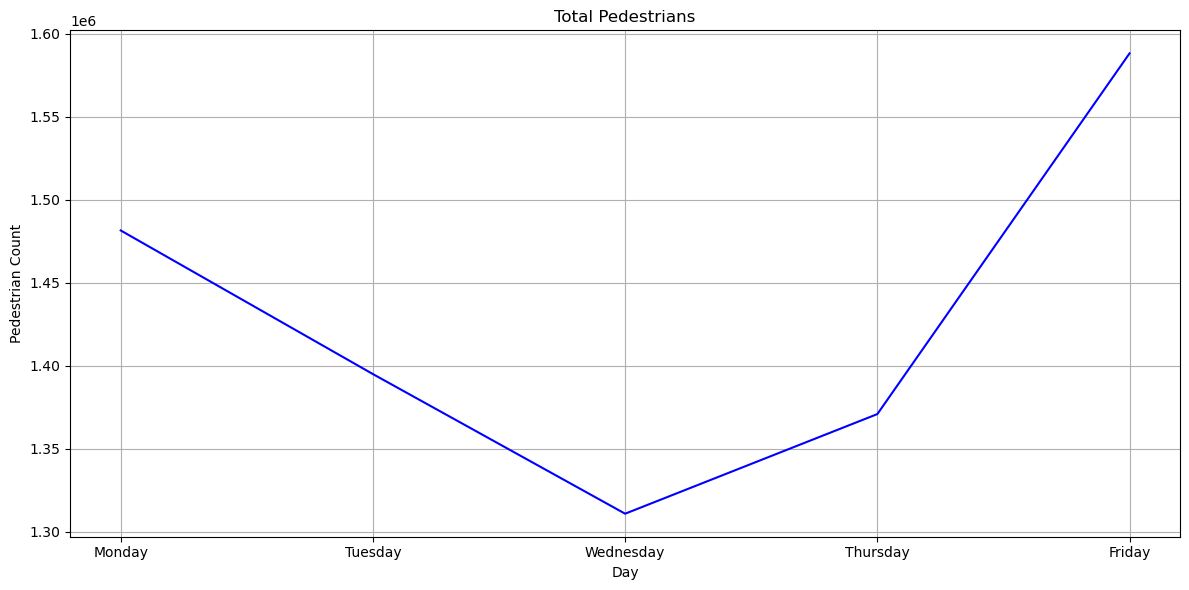

In [2]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_name'] = df['hour_beginning'].dt.day_name()
weekdays_df = df[(df['day_name'] != "Saturday") & (df['day_name'] != "Sunday")]
weekday_pedestrians = weekdays_df.groupby('day_name')['Pedestrians'].sum()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_pedestrians = weekday_pedestrians.reindex(ordered_days)

plt.figure(figsize=(12, 6))
plt.plot(weekday_pedestrians, color='blue')
plt.title('Total Pedestrians')
plt.xlabel('Day')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()

2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations (with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

- This question requires you to show the relationship between a numerical feature (Pedestrians) and a non-numerical feature (Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers ( 0,1,2..). This technique is called One-hot encoding.
- Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

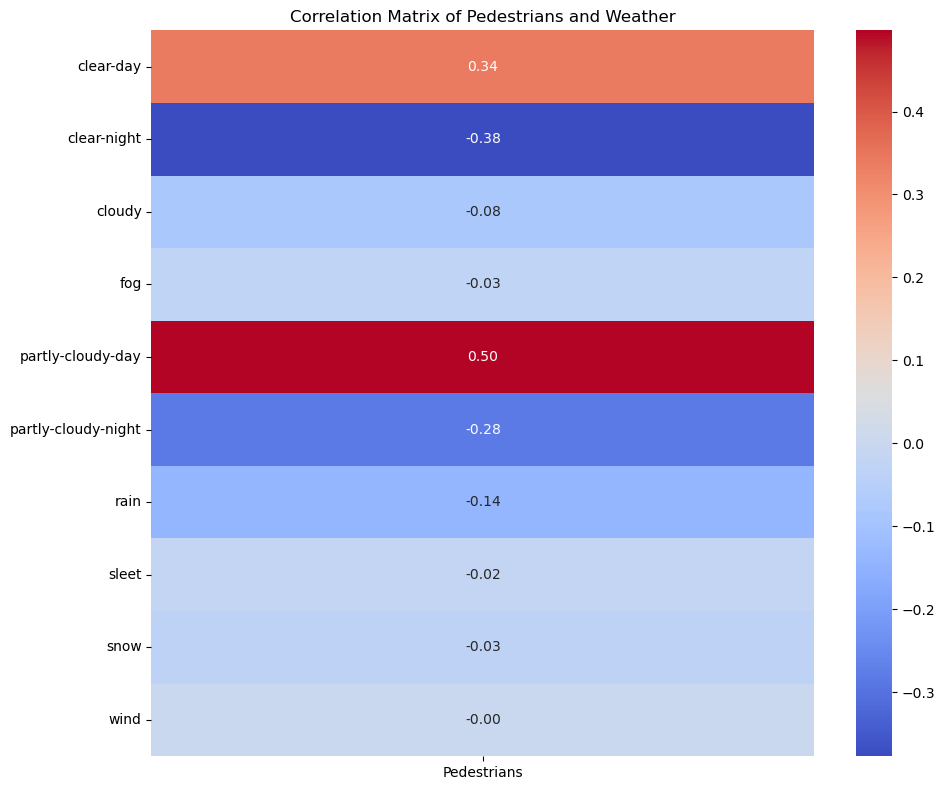

In [4]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
weather_dummies = pd.get_dummies(df_2019['weather_summary'])
df_encoded = pd.concat([df_2019['Pedestrians'], weather_dummies], axis=1)
corr_matrix = df_encoded.corr()

# Select correlations with 'Pedestrians' only
pedestrian_corr = corr_matrix[['Pedestrians']].drop('Pedestrians')

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pedestrian_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather')
plt.tight_layout()
plt.show()

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.
- Students can also show plots analyzing activity.

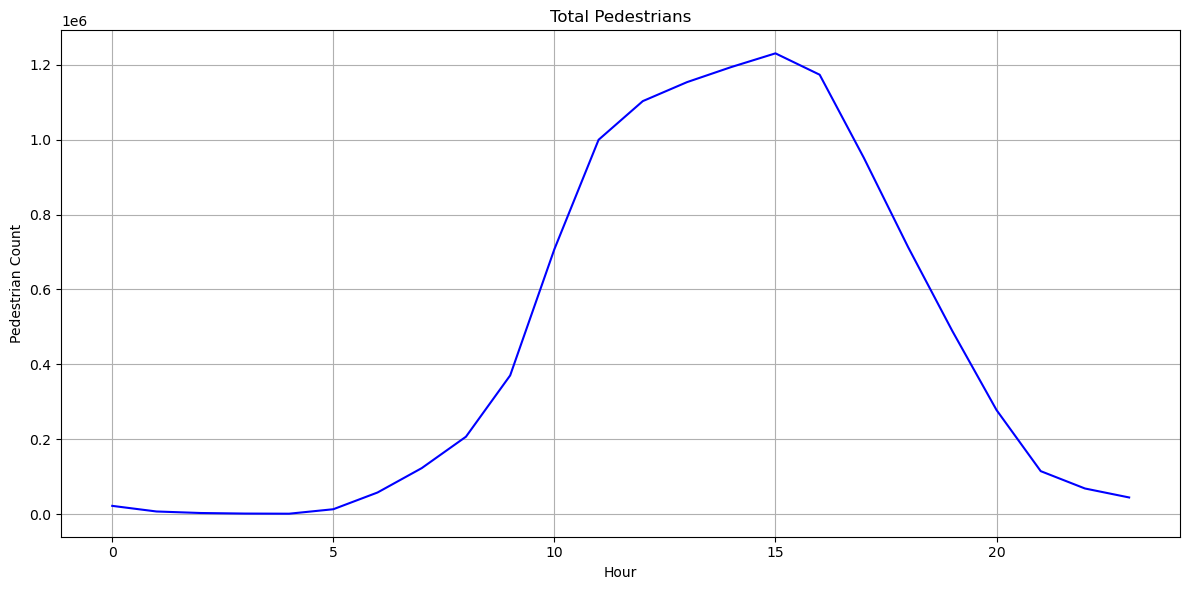

In [10]:
def time_of_day(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 21:
        return 'evening'
    else:
        return 'night'

df['hour'] = df['hour_beginning'].dt.hour
df['time_of_day'] = df['hour'].apply(time_of_day)
hour_pedestrians = df.groupby(df['hour'])['Pedestrians'].sum()

plt.figure(figsize=(12, 6))
plt.plot(hour_pedestrians, color='blue')
plt.title('Total Pedestrians')
plt.xlabel('Hour')
plt.ylabel('Pedestrian Count')
plt.grid(True)
plt.tight_layout()
plt.show()